In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import warnings
from tensorflow.keras import layers, models, optimizers, utils, regularizers
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
warnings.filterwarnings('ignore')
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [2]:
assert(tf.test.gpu_device_name())

2022-04-14 16:17:30.228937: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-14 16:17:30.250759: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-14 16:17:30.282613: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-14 16:17:30.282834: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

In [3]:
'''
    Cria uma função (int_func) que transforma cada string num inteiro. numpy.vectorize aplica essa função elemento por elemento
'''

int_func=lambda x: int(x)
vint_func=np.vectorize(int_func)

In [4]:
'''
    Cria uma função (ord_func) que transforma cada string num inteiro. numpy.vectorize aplica essa função elemento por elemento
'''

ord_func=lambda x: ord(x)-65 ## ATENÇÃO: veja abaixo o motivo de ter subtraído 65
vord_func=np.vectorize(ord_func)

In [5]:
def load_img_array(file):
    '''
    Lê os arquivos com os arrays das imagens. Divide por 255 para normalizar, pois as imagens eram grayscale.  
    '''
    temp=np.load(file)
    temp=temp.astype('float32')/255
    
    return temp

In [6]:
def plotar_acuracia_loss(modelo,nome):
    
    epochs=range(1,len(modelo.history['accuracy'])+1)

    plt.rcParams["figure.figsize"] = (13,6)

    plt.subplot(1, 2, 1)

    plt.plot(epochs,modelo.history['accuracy'], color='orange', label='Acurácia de treino')
    plt.plot(epochs,modelo.history['val_accuracy'], 'b', label ='Acurácia de validação')
    plt.title('Acurácia de treino e validação do '+nome)
    plt.xlabel('Epochs')
    plt.ylabel('Acurácia')
    plt.legend()

    plt.subplot(1, 2, 2)

    plt.plot(epochs,modelo.history['loss'], color='orange', label='Perda de treino')
    plt.plot(epochs,modelo.history['val_loss'], 'b', label ='Perda de validação')
    plt.title('Perda de treino e validação do '+nome)
    plt.xlabel('Epochs')
    plt.ylabel('Perda')
    plt.legend()

    plt.show()
    


In [7]:
training_img_char=load_img_array('training_img_char_aug.npy')
testing_img_char=load_img_array('testing_img_char_aug.npy')
validation_img_char=load_img_array('validation_img_char_aug.npy')

In [8]:
'''
    Lê os arquivos com os arrays dos labels. Notar que tais arrays contêm strings. Será necessário convertê-los para int usando
    a função ord(), quando o label for caractere, e int(), quando for inteiro. Cria o one-hot encode 
'''

training_label_char=utils.to_categorical(vord_func(np.load('training_label_char.npy')))
testing_label_char=utils.to_categorical(vord_func(np.load('testing_label_char.npy')))
validation_label_char=utils.to_categorical(vord_func(np.load('validation_label_char.npy')))

In [9]:
conv_base=ResNet50V2(weights='imagenet',
                     include_top=False,
                     input_shape=(119,77,3))

2022-04-14 16:17:31.922057: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-14 16:17:31.922312: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-14 16:17:31.922513: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-14 16:17:31.922836: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-14 16:17:31.923005: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from S

In [10]:
conv_base.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 119, 77, 3)  0           []                               
                                ]                                                                 
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 125, 83, 3)   0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 60, 39, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 62, 41, 64)   0           ['conv1_conv[0][0]']    

In [11]:
modelo = models.Sequential([
    conv_base,
    layers.Flatten(),
    
    layers.Dense(256,
                activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256,
                activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256,
                activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(26,
                activation='softmax')
])

In [12]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 4, 3, 2048)        23564800  
                                                                 
 flatten (Flatten)           (None, 24576)             0         
                                                                 
 dense (Dense)               (None, 256)               6291712   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               6

In [13]:
conv_base.trainable=False

In [14]:
modelo.compile(optimizer = optimizers.Adam(learning_rate = 0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
hist_modelo=modelo.fit(training_img_char, training_label_char, 
                 epochs=30,
                 batch_size=256,
                 validation_data=(validation_img_char, validation_label_char))

2022-04-14 16:17:41.279962: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 593762400 exceeds 10% of free system memory.
2022-04-14 16:17:41.688166: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 593762400 exceeds 10% of free system memory.


Epoch 1/30


2022-04-14 16:17:44.704135: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8303
2022-04-14 16:17:45.063153: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


22/22 [==============================] - 13s 400ms/step - loss: 2.7827 - accuracy: 0.3100 - val_loss: 1.9078 - val_accuracy: 0.4822
Epoch 2/30
22/22 [==============================] - 6s 298ms/step - loss: 1.8150 - accuracy: 0.4780 - val_loss: 1.6101 - val_accuracy: 0.6063
Epoch 3/30
22/22 [==============================] - 7s 323ms/step - loss: 1.4791 - accuracy: 0.5769 - val_loss: 1.3507 - val_accuracy: 0.6996
Epoch 4/30
22/22 [==============================] - 7s 301ms/step - loss: 1.2993 - accuracy: 0.6248 - val_loss: 1.2691 - val_accuracy: 0.7037
Epoch 5/30
22/22 [==============================] - 7s 308ms/step - loss: 1.1878 - accuracy: 0.6541 - val_loss: 1.2045 - val_accuracy: 0.7211
Epoch 6/30
22/22 [==============================] - 7s 303ms/step - loss: 1.0836 - accuracy: 0.6750 - val_loss: 1.1588 - val_accuracy: 0.7500
Epoch 7/30
22/22 [==============================] - 7s 301ms/step - loss: 0.9947 - accuracy: 0.7013 - val_loss: 1.1179 - val_accuracy: 0.7563
Epoch 8/30
22/22

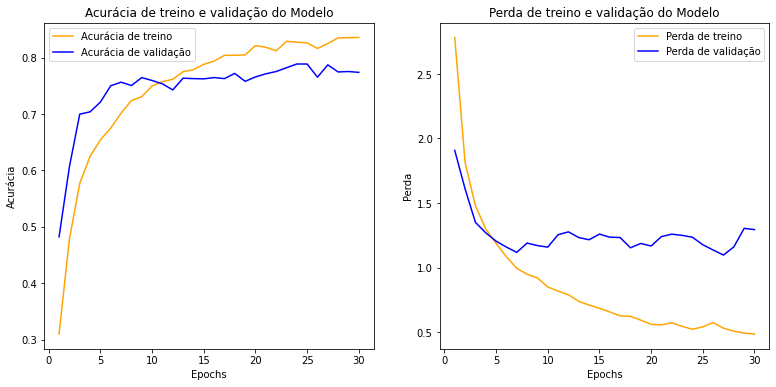

In [16]:
plotar_acuracia_loss(hist_modelo,"Modelo")